<h1 style="color:#ffc0cb;font-size:70px;font-family:Georgia;text-align:center;"><strong>Crazy Crossfit in 2015</strong></h1>

### 1. Preprocessing
+ Import python libraries and dataset
+ Merge 2 data frames (athletes & leaderboard_15)
+ Put change labels on the data.
+ Check and drop duplicated rows
+ Strip extra white-space and lowercase string content values
+ Make athlete_id unique
+ Drop meaningless columns or columns contains only a value: `retrieved_datetime_x`, `retrieved_datetime_y`, `year`, `stage`, `scaled`, `howlong`


### 2. EDA
created correlation maps to see the relationship between variables and Word Cloud to visualise text contents

### 3. Basic Statistics
+ Descriptive Statistics
+ Probability Distributions
+ Normality Test
+ Confidence Intervals
+ Normality Test

### 4. Inferential Statistics
+ Hypothesis Testing

+ The Mann-Whitney U test for comparing independent data samples: the nonparametric version of the Student t-test.
+ The Wilcoxon signed-rank test for comparing paired data samples: the nonparametric version of the paired Student t-test.
+ The Kruskal-Wallis H and Friedman tests for comparing more than two data samples: the nonparametric version of the ANOVA and repeated measures ANOVA tests.


<h1 style="color:#ffc0cb;font-size:70px;font-family:Georgia;text-align:center;"><strong>2. EDA</strong></h1>

In [48]:
# Install a conda package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install statsmodels
!{sys.executable} -m pip install wordcloud


# work with df in tabular representation
from datetime import time
import pandas as pd
# round the df in the correlation matrix
import numpy as np
import os
from scipy.stats import t
from scipy import stats
from statistics import *
from scipy.stats import shapiro
from numpy import mean
from numpy import std

# Modules for df visualization
import seaborn as sns
import matplotlib.pyplot as plt

from wordcloud import WordCloud

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

plt.rcParams['figure.figsize'] = [6, 6]

# Ensure that our plots are shown and embedded within the Jupyter notebook itself. Without this command, sometimes plots may show up in pop-up windows
%matplotlib inline

# overwrite the style of all the matplotlib graphs
sns.set()

# ignore DeprecationWarning Error Messages
import warnings
warnings.filterwarnings('ignore')

In [49]:
# check the version of the packages
print("Numpy version: ", np.__version__)
print("Pandas version: ",pd.__version__)
! python --version

Numpy version:  1.23.1
Pandas version:  1.4.3
Python 3.10.4


In [50]:
# set the general path of the external df
external_df_path = os.path.join(os.path.pardir,'data','interim')

# set the path for specific dfset from external dfset
df = os.path.join(external_df_path, 'cleaned_data.csv')

In [51]:
# import dfset
df = pd.read_csv(df, delimiter=',', skipinitialspace = True)

# convert columns to the best possible dtypes, object->string
df = df.convert_dtypes()

# select numeric columns
df_numeric = df.select_dtypes(include=[np.number]).columns.to_list()

# select non-numeric columns
df_string = df.select_dtypes(include='string').columns.tolist()


print("Numeric columns: ", df_numeric, "\n")
print("String columns: ", df_string, "\n\n")

# print dfset info
print("The shape and df type of the ORGINAL df:", str(df.info()))

# print first 5 rows
df.head(3)

Numeric columns:  ['athlete_id', 'age', 'height', 'weight', 'fran', 'helen', 'grace', 'filthy50', 'fgonebad', 'run400', 'run5k', 'candj', 'snatch', 'deadlift', 'backsq', 'pullups', 'rank', 'score'] 

String columns:  ['name', 'region', 'team', 'affiliate', 'gender', 'eat', 'train', 'background', 'experience', 'schedule', 'division'] 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   athlete_id  991 non-null    Int64 
 1   name        991 non-null    string
 2   region      991 non-null    string
 3   team        991 non-null    string
 4   affiliate   991 non-null    string
 5   gender      991 non-null    string
 6   age         991 non-null    Int64 
 7   height      991 non-null    Int64 
 8   weight      991 non-null    Int64 
 9   fran        991 non-null    Int64 
 10  helen       991 non-null    Int64 
 11  grace       991 non-null    Int6

,athlete_id,name,region,team,affiliate,gender,age,height,weight,fran,helen,grace,filthy50,fgonebad,run400,run5k,candj,snatch,deadlift,backsq,pullups,eat,train,background,experience,schedule,division,rank,score
0,2720,justin adams,south central,woodward crossfit,woodward crossfit,male,24,68,180,126,449,86,988,425,58,1302,315,240,475,405,80,i eat quality foods but don't measure the amount|,i workout mostly at a crossfit affiliate|i hav...,i played youth or high school level sports|,i began crossfit with a coach (e.g. at an affi...,i do multiple workouts in a day 3+ times a wee...,male,3448,464
1,6922,daniel adamson,south west,crossfit the point,crossfit the point,male,31,67,150,244,486,294,1217,330,63,1268,230,175,410,330,42,i eat quality foods but don't measure the amount|,i workout mostly at a crossfit affiliate|i inc...,i played college sports|,i began crossfit by trying it alone (without a...,i usually only do 1 workout a day|i do multipl...,male,35748,712
2,12563,steven lee adams,mid atlantic,crossfit kaiju,crossfit kaiju,male,37,72,210,162,482,143,1243,366,66,1320,285,205,525,425,49,i eat quality foods but don't measure the amou...,i workout mostly at a crossfit affiliate|i inc...,i played youth or high school level sports|i p...,i began crossfit with a coach (e.g. at an affi...,i do multiple workouts in a day 2x a week|i ty...,male,5073,485


In [52]:
# see the static of all numerical column
df.describe().T

,count,mean,std,min,25%,50%,75%,max
athlete_id,991.0,77301.827447,94565.819796,88.0,10446.0,33166.0,112518.0,568157.0
age,991.0,33.147326,6.681385,17.0,28.0,32.0,37.0,54.0
height,991.0,8534.258325,266470.674449,39.0,67.0,70.0,72.0,8388607.0
weight,991.0,180.637740,27.973706,88.0,163.5,183.0,199.5,298.0
fran,991.0,276.001009,374.220295,60.0,168.5,217.0,290.0,5940.0
helen,991.0,582.930373,351.778297,60.0,480.0,530.0,602.0,5940.0
grace,991.0,217.392533,375.440786,30.0,121.0,159.0,214.0,5940.0
filthy50,991.0,1458.544904,532.004458,50.0,1165.0,1359.0,1614.0,5940.0
fgonebad,991.0,436.349142,3167.322549,0.0,298.5,338.0,392.0,100000.0
run400,991.0,109.273461,353.075236,4.0,60.0,67.0,77.0,5940.0


In [53]:
df.run5k.unique()

<IntegerArray>
[1302, 1268, 1320, 1454, 1365, 1260, 1337, 1660, 1200, 1935,
 ...
 1701, 1477, 1883, 2565, 1852, 1743, 1901, 2186, 2100, 2069]
Length: 472, dtype: Int64

In [54]:
# Number of Unique Athlete
print(df.athlete_id.nunique() == df.shape[0])
# Summary Stats: weight
df.describe([0.01, 0.05, 0.10, 0.20, 0.80, 0.90, 0.95, 0.99])[["weight"]].T

True


,count,mean,std,min,1%,5%,10%,20%,50%,80%,90%,95%,99%,max
weight,991.0,180.63774,27.973706,88.0,117.9,133.0,140.0,156.0,183.0,204.0,215.0,220.0,250.0,298.0


In [55]:
# Groups & Target Summary Stats
df.groupby("gender").weight.agg(["count", "median", "mean", "std", "max"])

,count,median,mean,std,max
gender,,,,,
female,178,140.0,140.533708,13.775090,188
male,813,188.0,189.418204,21.976079,298


In [56]:
def visualize_word(col_name):
    text = df[col_name].values
    wordcloud = WordCloud().generate(str(text))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.savefig('visualize_word.png')
    plt.show()

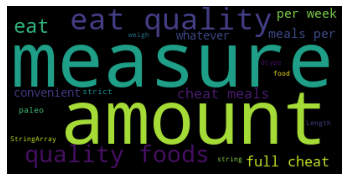

In [57]:
visualize_word('eat')

### The Central Limit Theorem
If n>30, the Central Limit Theorem can be used.

Unlike the normal case, these histograms all differ in shape. In particular, they become progressively less skewed as the sample size n increases.

provide convincing evidence that a sample size of n=30 is sufficient to overcome the skewness of the population distribution and give an approximately normal X sampling distribution.

In [58]:
# histogram average weight between athele male and female
import plotly.express as px

df1 = df[['weight','gender']]
fig = px.histogram(df1, x="gender",y="weight",  histfunc='avg')
fig.show()

<a id="7"></a> <br>
# Relationship Between Variables

<a id="8"></a> <br>
## Correlation
* Strength of the relationship between two variables
* Lets look at correlation between all features.

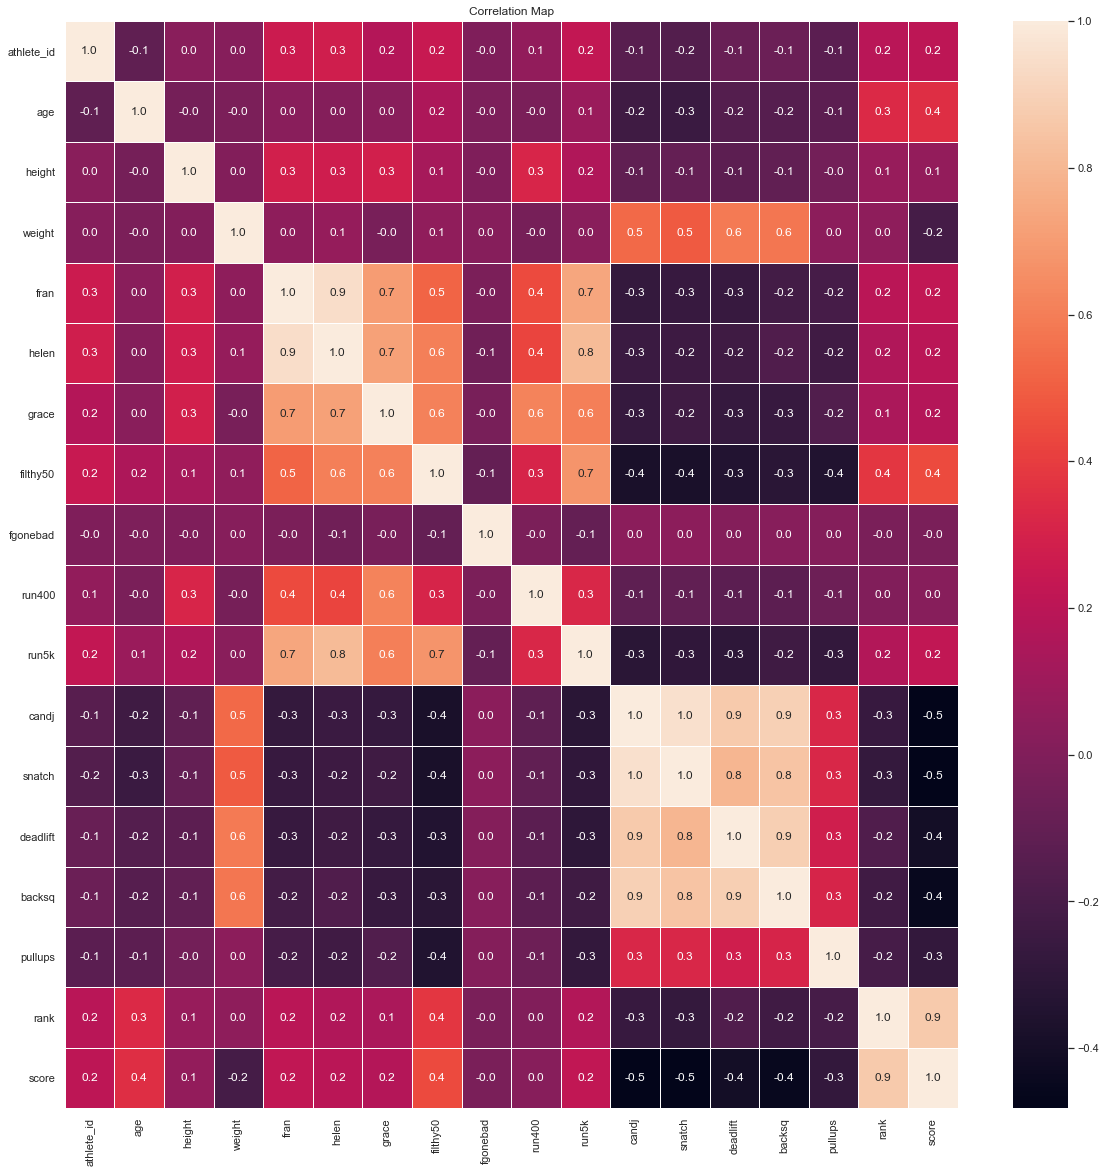

In [59]:
f,ax=plt.subplots(figsize = (20,20))
sns.heatmap(df.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.savefig('heatmap to indicates correlation between variables.png')
plt.show()

### ----------> OBSERVATION

+ There is a strong positive correlation between `helen` & `fran`, `helen` & `run5k`, `candj` & `backsq`, `backsq` & `deadlift`, `rank` & `score`, `backsq` & `snatch`.

+ There is **multicollinearity** (Mulitple independent variables are highly correlated) between attributes. If I want to feed these feature into my multiple regression model, I would need to drop 1 of the column that is strongly correlated with each other to prevent statistical insignificant problem

In [60]:
#  Groups & Target Summary Stats
df.groupby("gender").weight.agg(["count", "median", "mean", "std", "max"])

,count,median,mean,std,max
gender,,,,,
female,178,140.0,140.533708,13.775090,188
male,813,188.0,189.418204,21.976079,298


<a id="1"></a> <br>
# Histogram
* How many times each value appears in dfset. This description is called the distribution of variable
* Most common way to represent distribution of varible is histogram that is graph which shows frequency of each value.
* Frequency = number of times each value appears

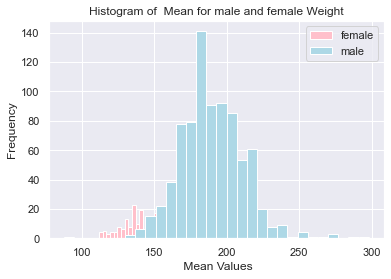

Most frequent female weight mean is:  134.8


In [61]:
female = plt.hist(df[df["gender"] == "female"].weight,bins=30,label = "female", color="pink")
male = plt.hist(df[df["gender"] == "male"].weight,bins=30,label = "male", color="lightblue")
plt.legend()
plt.xlabel(" Mean Values")
plt.ylabel("Frequency")
plt.title("Histogram of  Mean for male and female Weight")
plt.savefig('female_male_weight_hist.png')
plt.show()
frequent_weight_mean = female[0].max()
index_frequent_weight_mean = list(female[0]).index(frequent_weight_mean)
most_frequent_weight_mean = female[1][index_frequent_weight_mean]
print("Most frequent female weight mean is: ",most_frequent_weight_mean)

# ---------
# Randomly select a 10 number of rows from a dataframe


In [62]:
df2 = df.sample(n=10, random_state=42)
df2.head(3)

,athlete_id,name,region,team,affiliate,gender,age,height,weight,fran,helen,grace,filthy50,fgonebad,run400,run5k,candj,snatch,deadlift,backsq,pullups,eat,train,background,experience,schedule,division,rank,score
213,11444,dan juchniewicz,mid atlantic,crossfit rage,crossfit rage,male,26,69,165,268,473,224,1201,315,54,1160,255,216,407,345,0,i eat quality foods but don't measure the amou...,i workout mostly at a crossfit affiliate|,i played youth or high school level sports|i p...,i began crossfit by trying it alone (without a...,i do multiple workouts in a day 3+ times a wee...,male,14739,573
331,19144,alexander pogrebinsky,north east,crossfit southie,crossfit southie,male,31,70,189,354,625,209,1504,238,90,1500,235,185,455,315,37,i eat 1-3 full cheat meals per week|,i workout mostly at a crossfit affiliate|i rec...,i have no athletic background besides crossfit|,i began crossfit with a coach (e.g. at an affi...,i usually only do 1 workout a day|i typically ...,male,43445,766
501,144032,sheldon johnson,north west,crossfit intensify,crossfit intensify,male,45,72,205,231,212,229,1996,289,63,1459,195,145,325,275,19,i eat quality foods but don't measure the amou...,i workout mostly at a crossfit affiliate|i rec...,i played youth or high school level sports|,i began crossfit with a coach (e.g. at an affi...,decline to answer|,male,43445,766


In [63]:
# convert specified column in the dataframe into series
from numpy import mean
from numpy import std

population_weight = df['weight'].squeeze()
print('Poppulation mean=%.3f stdv=%.3f' % (mean(population_weight), std(population_weight)))
sample_weight = df2['weight'].squeeze()
print('Sample mean=%.3f stdv=%.3f' % (mean(sample_weight), std(sample_weight)))

Poppulation mean=180.638 stdv=27.960
Sample mean=189.700 stdv=18.122


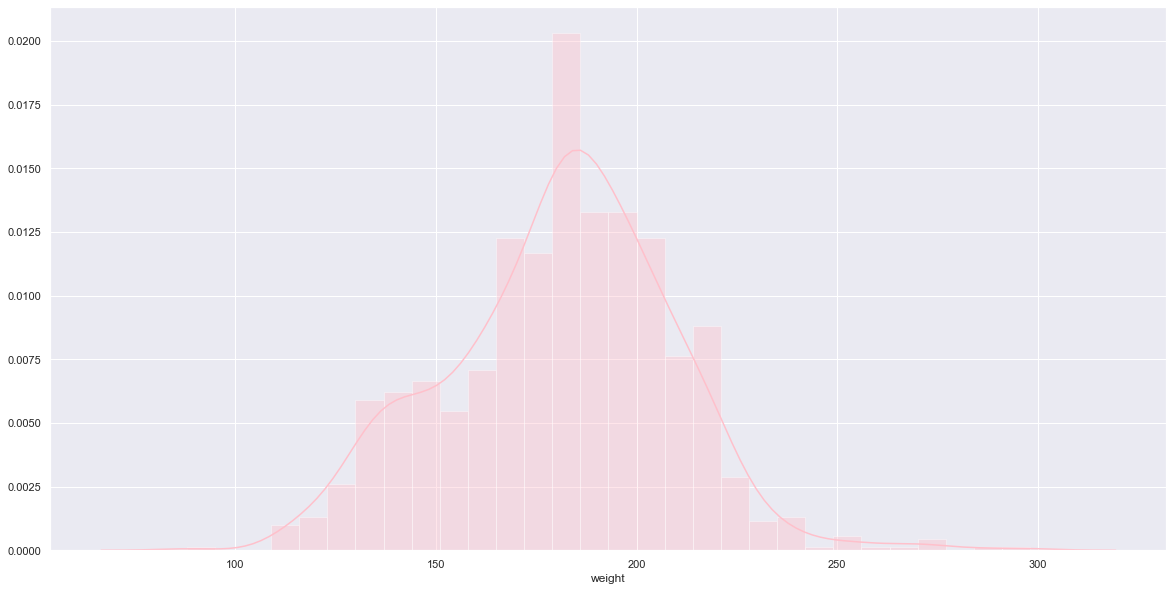

In [64]:
# Distribution of population weight
plt.figure(figsize = (20,10))
sns.distplot(population_weight,color = 'pink')
plt.savefig('pop_distplot.png')

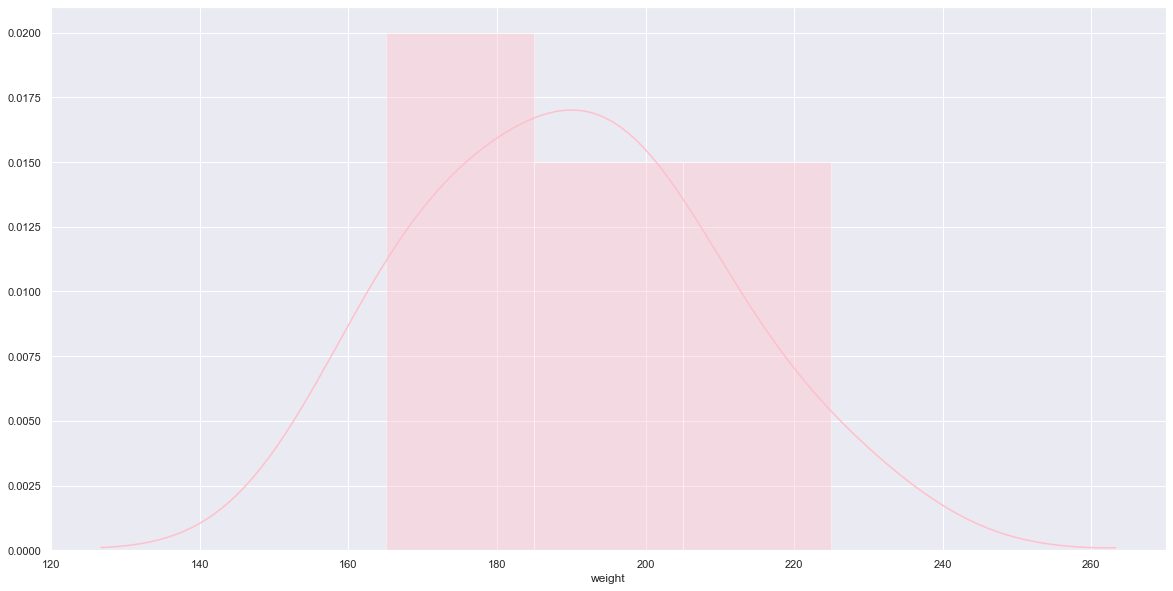

In [65]:
# Distribution of sample weight
plt.figure(figsize = (20,10))
sns.distplot(sample_weight,color = 'pink')
plt.savefig('sample_distplot.png')

<h1 style="color:#ffc0cb;font-size:70px;font-family:Georgia;text-align:center;"><strong>2. Normality Test</strong></h1>

I need to decide whether to use parametric or nonparametric statistical methods.

+ H₀: The data is normally distributed.
+ H₁: The data is not normally distributed.
+ H₀: The variances of the samples are the same. 
+ H₁: The variances of the samples are different.
At α=0.05. If the p-value is >0.05, it can be said that the mean weight is normally distributed.


# Shapiro-Wilk Test

In [66]:
def check_normality_shapiro(data):
    test_stat_normality, p_value_normality=stats.shapiro(data)
    print("p value:%.3f" % p_value_normality)
    stat, p = shapiro(df.weight)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    if p_value_normality <0.05:
        print("Reject null hypothesis: The data is not normally distributed")
    else:
        print("Fail to reject null hypothesis: The data is normally distributed")

In [67]:
check_normality_shapiro(population_weight)

p value:0.000
Statistics=0.989, p=0.000
Reject null hypothesis: The data is not normally distributed


In [68]:
check_normality_shapiro(sample_weight)

p value:0.732
Statistics=0.989, p=0.000
Fail to reject null hypothesis: The data is normally distributed


# Check homogeneity of variance using Levene’s test

In [69]:
def check_variance_homogeneity(group1, group2):
    test_stat_var, p_value_var= stats.levene(group1,group2)
    print("p value:%.3f" % p_value_var)
    if p_value_var <0.05:
        print("Reject null hypothesis: The variances of the samples are different.")
    else:
        print("Fail to reject null hypothesis: The variances of the samples are same.")

In [70]:
check_variance_homogeneity(population_weight, sample_weight)

p value:0.215
Fail to reject null hypothesis: The variances of the samples are same.


<h1 style="color:#ffc0cb;font-size:70px;font-family:Georgia;text-align:center;"><strong>3. Parametric Statistical Significance Tests</strong></h1>

+ Ho: Athlete population mean weight is the same as athlete sample mean weight in the CrossFit Game 2015: μ₁=μ₂
+ Ha: The population and sample weights are different μ₁# μ₂


# T-Sample Test

In [71]:
ttest,p_value = stats.ttest_ind(np.array(population_weight).astype(int), np.array(sample_weight).astype(int))
print("p value:%.3f" % p_value)
if p_value <0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

p value:0.307
Fail to reject null hypothesis


# 1 Small Sample Hypothesis Test
A test on 10 athletes who competed in the crossfit, the weight of each athlete is inspected, using alpha = 0.05.

A one-sample t-test checks whether a sample mean differs from the population mean.


In [72]:
import scipy.stats as stats
import math

In [73]:
print( population_weight.mean() )
print( sample_weight.mean() )

180.6377396569122
189.7


In [74]:
# cast population_weight and sample_weight as numeric values
population_weight = population_weight.astype(float)
sample_weight = sample_weight.astype(float)

In [75]:
stats.ttest_1samp(a = sample_weight,               # Sample data
                 popmean = population_weight.mean())  # Pop mean

Ttest_1sampResult(statistic=1.5002015259335348, pvalue=0.16779941438154244)

> t critical is: [-2.262,2.262]

In [76]:
stats.t.ppf(q=0.025,  # Quantile to check
            df=9)  # Degrees of freedom

-2.262157162740992

In [77]:
stats.t.ppf(q=0.975,  # Quantile to check
            df=9)  # Degrees of freedom

2.2621571627409915

In this case, the p-value is higher than our significance level α (0.05), so we should reject the null hypothesis. If we were to construct a 95% confidence interval for the sample, it captures a population mean of 180.638

In [78]:
sigma = sample_weight.std()/math.sqrt(10)  # Sample stdev/sample size

stats.t.interval(0.95,                        # Confidence level
                 df = 9,                     # Degrees of freedom
                 loc = sample_weight.mean(), # Sample mean
                 scale= sigma)                # Standard dev estimate

(176.0349978043897, 203.3650021956103)

On the other hand, it is not significant at the 80% confidence level. This means if we were to construct a 80% confidence interval, it even would not capture the population mean:

In [79]:
stats.t.interval(alpha = 0.8,                # Confidence level
                 df = 9,                     # Degrees of freedom
                 loc = sample_weight.mean(), # Sample mean
                 scale= sigma)                # Standard dev estimate

(181.34554476671252, 198.05445523328746)

# Calculate Z score for mean weight of different gender

In [90]:
# selecting rows based on condition
male_weight = df[df['gender'] == 'male']
female_weight = df[df['gender'] == 'female']
df.gender.unique()

<StringArray>
['male', 'female']
Length: 2, dtype: string

In [81]:
# Import statistics Library
import statistics

print("Population Male Mean: "+str(male_weight['weight'].mean()))
male_weight_sample = male_weight.sample(frac=0.10)
sample_mean_male = male_weight_sample['weight'].mean()
print("Sample Male Mean: "+str(sample_mean_male))
sample_std_male = statistics.stdev(male_weight_sample.weight)
print("Sample Male Standard Deviation: "+str(sample_std_male))

Population Male Mean: 189.41820418204182
Sample Male Mean: 187.65432098765433
Sample Male Standard Deviation: 23.53720459187964


In [82]:
print("Population female Mean: "+str(female_weight['weight'].mean()))
female_weight_sample = female_weight.sample(frac=0.10)
sample_mean_female = female_weight_sample['weight'].mean()
print("Sample female Mean: "+str(sample_mean_female))
sample_std_female = statistics.stdev(female_weight_sample.weight)
print("Sample female Standard Deviation: "+str(sample_std_female))

Population female Mean: 140.53370786516854
Sample female Mean: 144.05555555555554
Sample female Standard Deviation: 16.522711641858304


In [83]:
import math
# Confidence Level 95 %  for one sided Normal curve
zscore_critical = 1.65
# Calculate the test statistics
zscore_test_stat = ((sample_mean_male - sample_mean_female)*math.sqrt(8916))/sample_std_female
print(zscore_test_stat)

249.15975668316847


<a id="1"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>Wilcoxon signed-rank test</strong></h1>

+ Single paired sample.
+ The test assumes that the distribution being sampled is continuous and symmetric about its mean.

In [91]:
# make the dataframe one-dimensional
male_weight = male_weight['weight']
female_weight = female_weight['weight']

In [99]:
# Wilcoxon signed-rank test
from scipy.stats import wilcoxon

# generate two paired samples
data1 = female_weight.head(25)
data2 = female_weight.tail(25)
# compare samples
stat, p = wilcoxon(data1, data2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Statistics=130.000, p=0.396
Same distribution (fail to reject H0)


<a id="1"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>Mann-Whitney U test</strong></h1>

+ 2 independent samples

In [95]:
# generate two independent samples
data1 = male_weight.sample(25)
data2 = female_weight.sample(25)

In [96]:
data11 = data1.to_numpy(dtype=int)

In [97]:
data22 = data2.to_numpy(dtype=int)

In [98]:
# Mann-Whitney U test
from scipy.stats import mannwhitneyu
# compare samples
stat, p = mannwhitneyu(data11, data22)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Statistics=599.500, p=0.000
Different distribution (reject H0)


<a id="1"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>Single Variance</strong></h1>


In [102]:
# Find the Chi-Square Critical Value
import scipy.stats
# find Chi-Square critical value for 2 tail hypothesis tests
alpha = 0.05

df = 24

# X² for upper tail
print(f'The critical value X²U for the upper tail is {scipy.stats.chi2.ppf(1-alpha, df=df)}') # 39.3641
# X² for lower tail
print(f'The critical value X²L for the lower tail is {scipy.stats.chi2.ppf(alpha, df=df)}') # 12.4011

The critical value X²U for the upper tail is 36.41502850180731
The critical value X²L for the lower tail is 13.848425027170224


In [107]:
# Python Program illustrating
# numpy.var() method
import numpy as np

# 1D array
arr = data2

print("arr : ", arr)
print("var of arr : ", np.var(arr))

arr :  988    142
825    136
934    130
937    142
927    125
840    150
918    165
904    156
954    145
906    134
916    156
942    140
933    160
823    145
873    151
956    151
979    132
978    160
874    145
948    120
960    142
877    148
984    160
898    133
920    148
Name: weight, dtype: Int64
var of arr :  129.8304


<a id="1"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>Summary</strong></h1>

# References

+ Machine Learning Mastery. 2022. A Gentle Introduction to Normality Tests in Python. [online] Available at: <https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/> [Accessed 22 August 2022].

+ Docs.scipy.org. 2022. Statistical functions (scipy.stats) — SciPy v1.9.0 Manual. [online] Available at: <https://docs.scipy.org/doc/scipy/reference/stats.html> [Accessed 26 August 2022].

+ [Cast Series to Numpy int datatype](https://pandas.pydata.org/pandas-docs/version/0.24.0rc1/api/generated/pandas.Series.to_numpy.html)